<a href="https://colab.research.google.com/github/mmassonn/heart_attack_prediction/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet : Heart attack prediction


##I. Définir l'objectif

Objectif : Prédiction du risque d’infartus à partir des données cliniques

metrique : c-index

##II. Importer les bibliothèques/framework

In [12]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##III. EDA(Exploration et analyse des données)

In [16]:
#load data
df = pd.read_csv('drive/MyDrive/Projet_2022/heart_attack_prediction/dataset.csv')

###1.shape analysis

In [17]:
#explore first fives rows ==> df values
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###Les caractériqtiques sont les suivantes :

Age: age du patient [années]

Sex: sex du patient [M: Homme, F: Femme]

ChestPainType: type de douleur thoracique [TA: Angine typique, ATA: Angine atypique, NAP: Douleur non angineuse, ASY: Asymptomatique]

RestingBP: tension artérielle au repos [mm Hg]

Cholesterol: cholestérol sérique [mm/dl]

FastingBS: glycémie à jeun [1: si FastingBS > 120 mg/dl, 0: autre]

RestingECG: résultats de l'électrocardiogramme au repos [Normal: Normal, ST: ayant une anomalie de l'onde ST-T (T inversions d'ondes et/ou ST élevation ou dépression > 0.05 mV), LVH: montrant une hypertrophie ventriculaire gauche probable ou certaine par le critére 'Estes']

MaxHR: fréquence cardiaque maximale atteinte [Valeur numérique entre 60 et 202]

ExerciseAngina: angine induite par l'effort [Y: OUI, N: NON]

Oldpeak: oldpeak = ST [Valeur numérique mesurée en dépression]

ST_Slope: la pente du segment ST d'effort maximal [Up: ascendant, Flat: plat, Down: descendant]

HeartDisease: Cardiopathie [1: OUI, 0: NON]

target identification : target

In [18]:
#shape :
df.shape 

(918, 12)

Nombre de lignes = 918 patients

Nombre de colonnes = 11 caractéristiques + 1 cible

Cible = Cardiopathie



In [19]:
#variable types : int64=13, float64=1
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

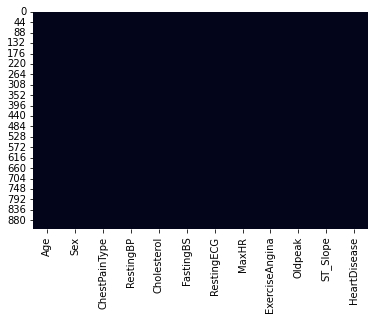

In [20]:
#Nan values   
sns.heatmap(df.isna(), cbar=False)

Il n'y a pas de valeur manquante.

###2.data analysis

In [21]:
#target vizualisation
df['HeartDisease'].value_counts(normalize = True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Il y a 55% de patients atteint de cardiopathie et 45% de patients non atteint de cardiopathie. La base de donnée est équilibrée.

### RELATION : VARIABLE DISTRIBUTIONS

In [ ]:
#continue variables histograms : normalized
for col in df:
    plt.figure()
    sns.distplot(df[col])

###RELATION : TARGET-VARIABLE

In [ ]:
#created positive and negative under set
positive_df = df[df['target'] == 1]   
negative_df = df[df['target'] == 0]   

In [ ]:
#created positive and negative under set
features_df = df.drop('target', axis=1) 

In [ ]:
#target/feature_df : sex, thalach, restecg, slope, thal exang differents 
for col in features_df:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label = 'negative')
    plt.legend()  

###RELATION : VARIABLE-VARIABLE

NULL HYPOTHESIS (H0):

Les individus ayant une crise cardiaque ont  une fréquence cardiaque maximale atteinte (thalach) significativement différents
H0 = la fréquence cardiaque maximale atteinte est égal chez les individus positifs et négatifs.


In [ ]:
#import packages 
from scipy.stats import ttest_ind

In [ ]:
#normalement autant de positif que de négatif mais ce n'est pas le cas
positive_df.shape
negative_df.shape

In [ ]:
balanced_neg = positive_df.sample(negative_df.shape[0])

In [ ]:
#defined t-test
def t_test(col):
    alpha =0.02
    stat, p = ttest_ind(balanced_neg[col], positive_df[col])
    if p< alpha:
        return 'HO rejetée'
    else: 
        return 0

for col in features_df :
    print (f'{col :-<50} {t_test(col)}')

#IV. Pre-processing

In [ ]:
#import packages     
from sklearn.model_selection import train_test_split

In [ ]:
#split Train and Test set  
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
trainset['target'].value_counts()
testset['target'].value_counts()

In [ ]:
#defined encodage, feature_engineering and imputation tools

def make_standard_normal(df):
    
    # Remove skew by applying the log function to the train set, and to the test set
    df= np.log(df)
    
    #calculate the mean and standard deviation of the training set
    mean = df.mean(axis = 0)
    stdev = df.std(axis = 0)
    
    # standardize the training set
    df = (df-mean)/stdev
 
    return df


def imputation(df):   
    df = df.dropna(axis=0)
    return df

#defined pre-processing    
def preprocessing(df):
    col=['age','trestbps', 'chol', 'thalach']
    df[col] = df[col].apply(make_standard_normal)
    df = imputation(df)
    
    X = df.drop('target', axis =1)
    y = df['target']
    
    print(y.value_counts())
    
    return X,y

In [ ]:
#applied pre-processing
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

#V. Modelling

In [ ]:
#import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler

In [ ]:
#pipelined pre-processor and model
RandomForest = RandomForestClassifier (random_state = 0)
AdaBoost = AdaBoostClassifier (random_state = 0)
SVM = make_pipeline(StandardScaler(),SVC (probability=True))
KNN = make_pipeline(StandardScaler(),KNeighborsClassifier ())

#VI. Evaluation process

In [ ]:
#import modules
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve

##defined evaluation


In [ ]:
#Evaluate the model using the C-index
def cindex(y_true, scores):
    n = len(y_true)
    assert len(scores) == n
    concordant = 0
    permissible = 0
    ties = 0 
   # use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n): #choose the range of j so that j>i
            # Check if the pair is permissible (the patient outcomes are different)
            if y_true[i] != y_true[j]:
                # Count the pair if it's permissible
                permissible += 1
                # For permissible pairs, check if they are concordant or are ties
                # check for ties in the score
                if scores[i] == scores[j]:
                    # count the tie
                    ties += 1
                    # if it's a tie, we don't need to check patient outcomes, continue to the top of the for loop.
                    continue
                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has a lower risk score than patient j
                    if scores[i] < scores[j]:
                        # count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair.
                    # Already checked for ties earlier
                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        #count the concordant pair
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair.
                    # We already checked for ties earlier
    # calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs.
    c_index = (concordant + 0.5 * ties) / permissible
    return c_index

##defined evaluation model

In [ ]:
#defined evaluation model
def evaluation(model):
    model.fit(X_train, y_train) 
    y_train_preds = model.predict_proba(X_train)[:, 1]
    print(cindex(y_train.values, y_train_preds))
    
    y_test_preds = model.predict_proba(X_test)[:, 1]
    print(cindex(y_test.values, y_test_preds))
       
    N,train_score,val_score = learning_curve(model, X_train, y_train, cv=4, scoring ='f1') 
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='val score')
    plt.legend()  

In [ ]:
#evaluated many models
dict_of_models = {'RandomForest' : RandomForest,'AdaBoost' : AdaBoost,'SVM': SVM,'KNN': KNN}
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)